In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Import data & general info

In [2]:
da_test = pd.read_csv("test/da_test.csv")
temp = da_test.copy()

In [3]:
temp.head()

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,actual_time_arrival
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,304.428571,520.857143,652.428571,2,15,00:28:13
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,254.941176,280.000000,420.941176,2,4,00:17:01
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,220.390244,474.097561,497.658537,1,9,00:16:55
3,Wednesday,00:04:20,d096e644f8596611ff65c5b07aed9f9d17c2ec3158edc6...,70319476604a22c258c394d9b8c879d6d32d511bd2b402...,10.753824,106.683894,10.760239,106.668003,201.444444,278.907407,583.148148,1,12,00:17:42
4,Wednesday,00:06:57,3f8de1592f374f220e4be4456c7c0ec226729af98e99ec...,77e06752127e561d37876418b65159ec9aaa1ad4f86453...,10.796606,106.704031,10.789168,106.714135,213.000000,549.285714,674.142857,1,17,00:28:33


In [4]:
temp.columns

Index(['week_day', 'order_created_at_time', 'restaurant_id_h', 'order_id_h',
       'noised_restaurant_latitude', 'noised_restaurant_longitude',
       'noised_drop_latitude', 'noised_drop_longitude',
       'resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
       'resto_avg_delivery_time', 'no_items', 'restaurant_category_id',
       'actual_time_arrival'],
      dtype='object')

In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111536 entries, 0 to 111535
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   week_day                            111536 non-null  object 
 1   order_created_at_time               111536 non-null  object 
 2   restaurant_id_h                     111536 non-null  object 
 3   order_id_h                          111536 non-null  object 
 4   noised_restaurant_latitude          111536 non-null  float64
 5   noised_restaurant_longitude         111536 non-null  float64
 6   noised_drop_latitude                111536 non-null  float64
 7   noised_drop_longitude               111536 non-null  float64
 8   resto_avg_driver_arrive_resto_time  111536 non-null  float64
 9   resto_avg_merchant_prepare_time     111536 non-null  float64
 10  resto_avg_delivery_time             111536 non-null  float64
 11  no_items                  

In [6]:
temp.describe()

,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id
count,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000
mean,10.788237,106.682095,10.783958,106.643282,218.405501,412.952724,574.433440,2.014596,10.262032
std,0.033149,0.037906,0.209750,2.045410,86.907636,196.060413,236.326783,1.214112,5.166189
min,10.663821,106.555216,0.000044,0.000011,2.000000,-45.000000,13.000000,0.000000,3.000000
25%,10.763392,106.658120,10.762997,106.658069,167.951613,274.052632,476.777027,1.000000,4.000000
50%,10.787571,106.682501,10.786335,106.682159,207.666667,380.500000,551.412500,2.000000,12.000000
75%,10.805975,106.702622,10.807998,106.703595,251.652174,507.031250,638.604167,3.000000,13.000000
max,10.904855,106.844476,10.914802,106.962670,3269.000000,7093.000000,28756.000000,23.000000,20.000000


In [7]:
temp.describe(exclude=np.number).T

,count,unique,top,freq
week_day,111536,7,Wednesday,22285
order_created_at_time,111536,47484,11:33:07,12
restaurant_id_h,111536,8987,79fdc2a90e0af23c56604ace4f60df5e6bae2238f675a2...,1898
order_id_h,111536,111536,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,1
actual_time_arrival,111536,47468,13:11:20,15


In [8]:
sum(temp.duplicated())

0

# Data preparation

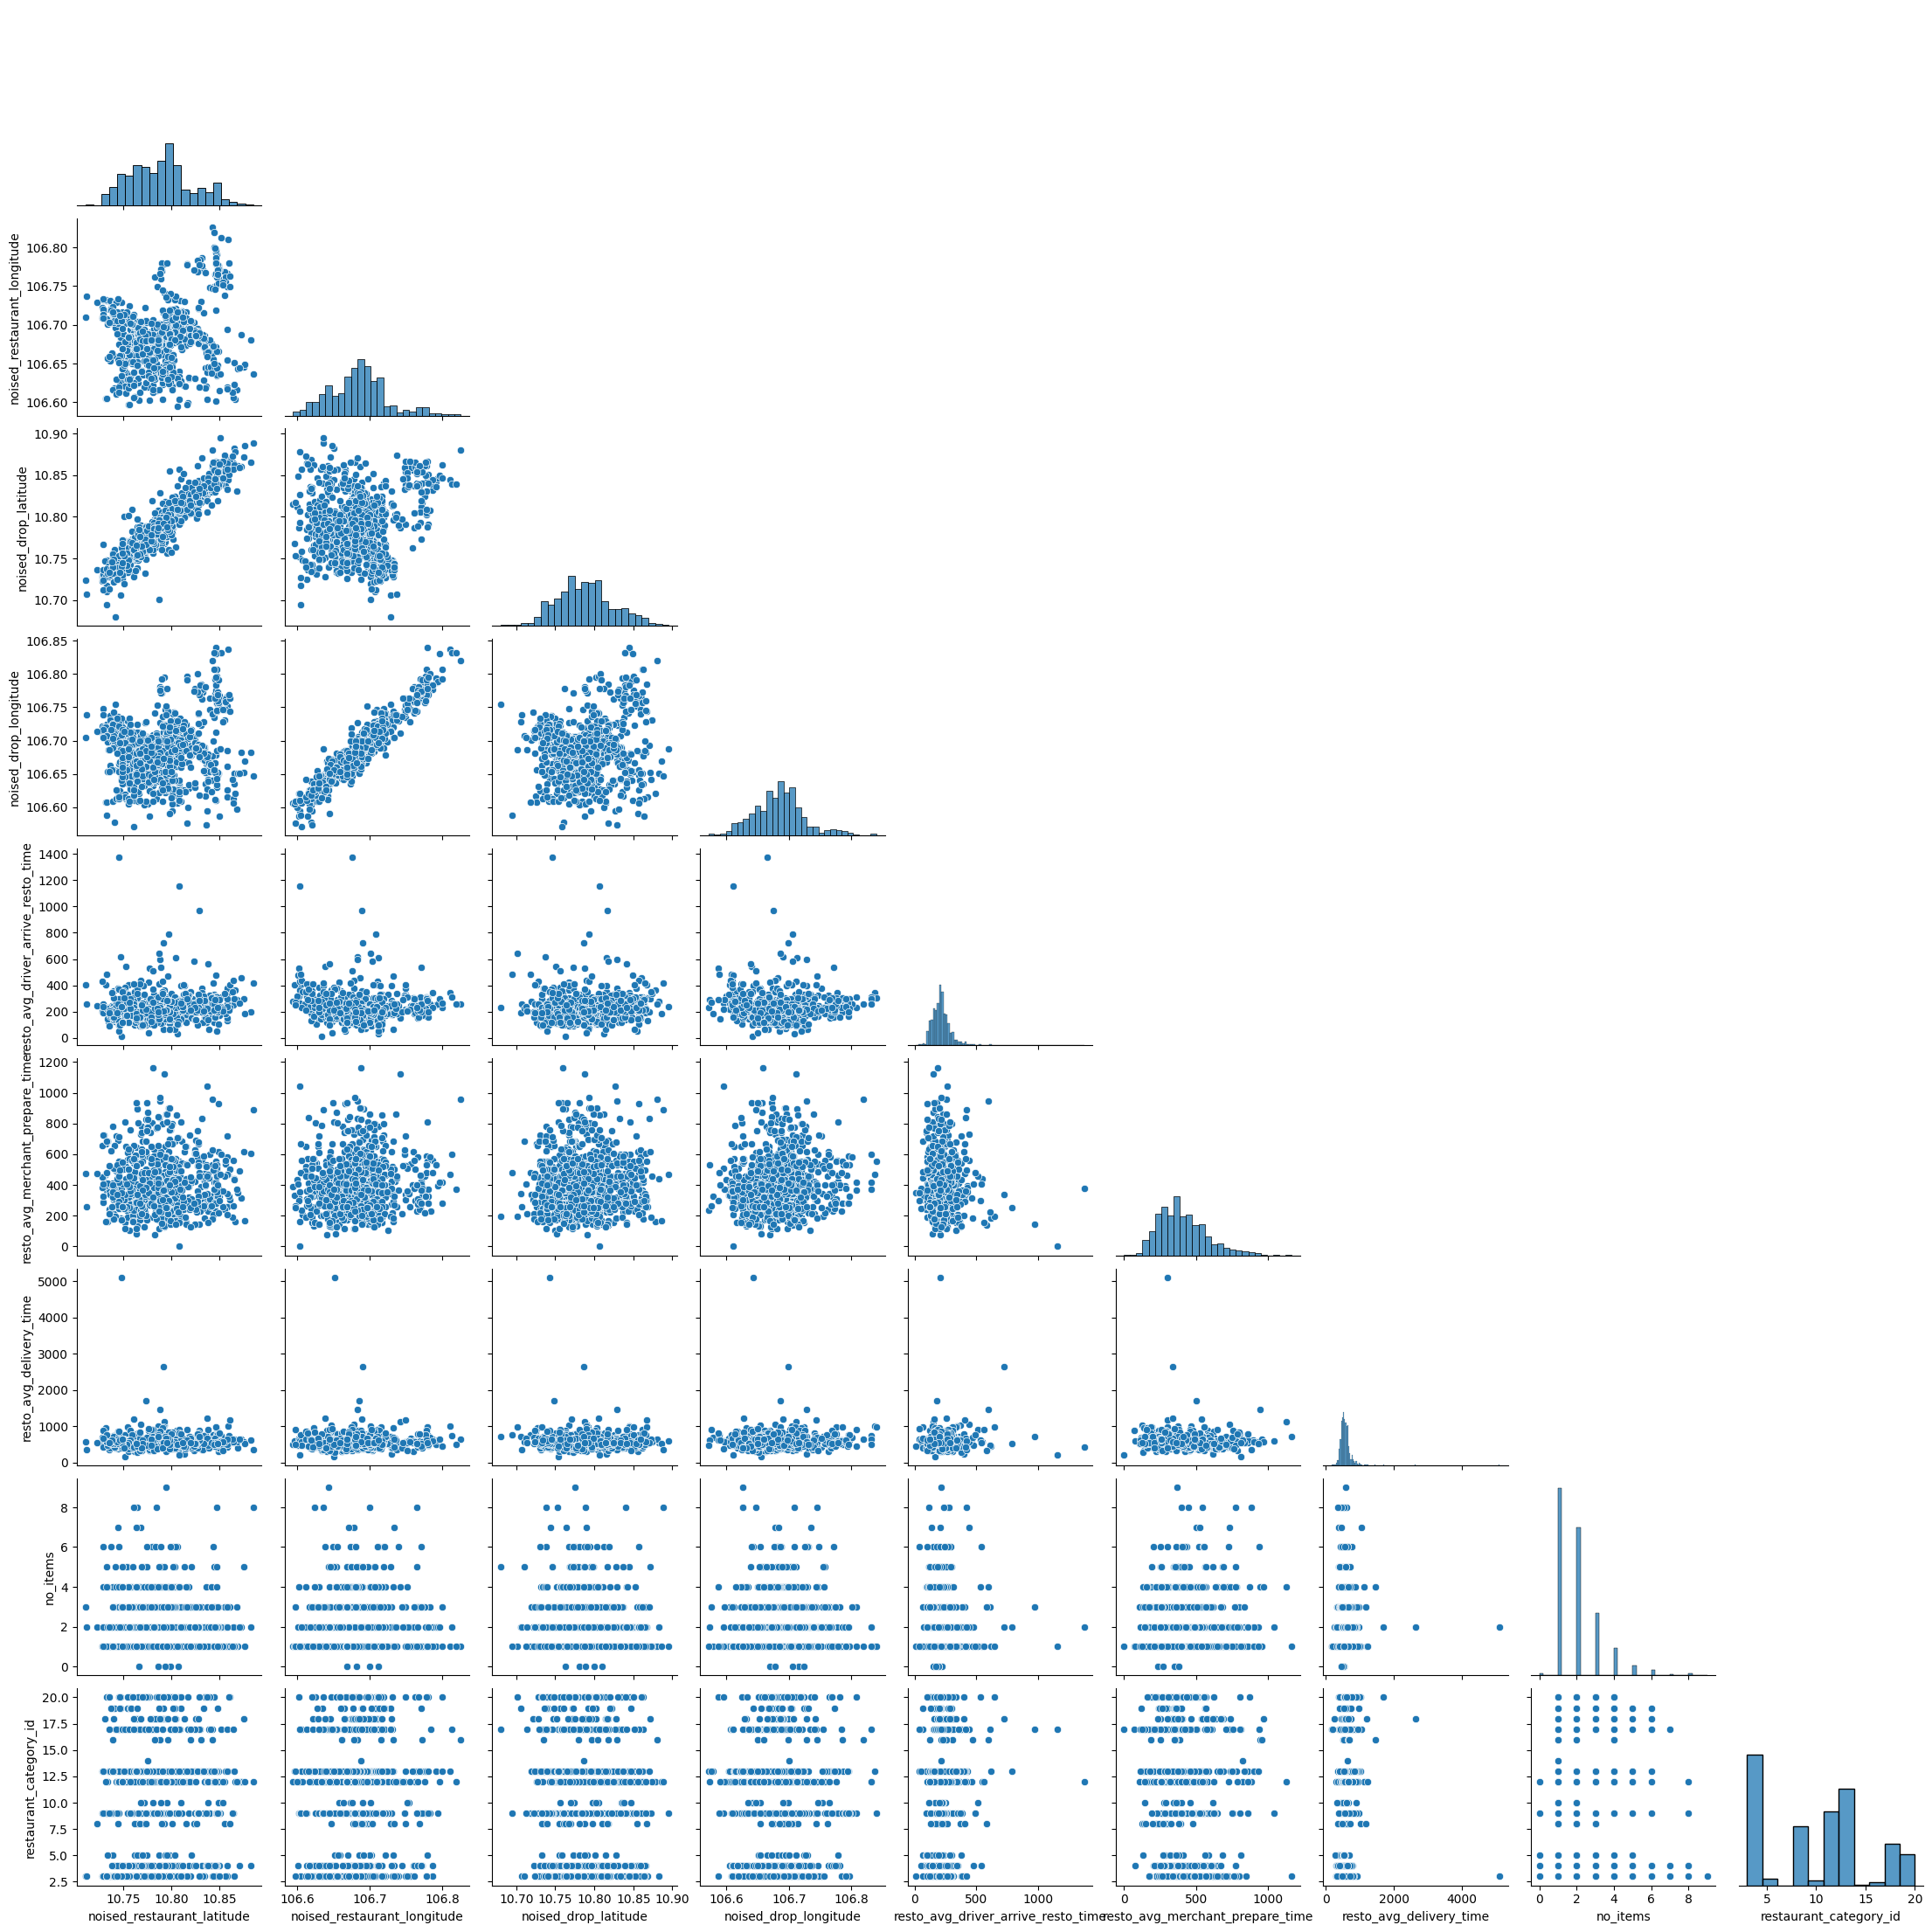

In [9]:
sns.pairplot(temp.sample(n=1000),corner=True)

**1. Turn units of 3 avg duration from seconds to minutes**
**2. Add new features derived from original features**
    
- `actual_time_arrival` - `order_created_at_time` ⇒ `actual_duration`

- long and lat of resto and drop place ⇒ `distance`
    
- sum of 3 avg duration ⇒ `estimated_duration`

- `resto_avg_merchant_prepare_time` / `no_items` ⇒ `avg_per_item`
    
- `order_created_from` ⇒ `hour_created`

- `hour_created` ⇒ `is_peak_hour` (hour with high volume of orders)

- `week_day` ⇒ `week_day_code` (to turn categorical to numerical)

- `week_day_code` ⇒ `is_Wed` (Wednesday has unusual volume of orders); `is_weekend` (Sat and Sun)

- long and lat of resto ⇒ `restaurant_cluster_no` (grouping into 5 areas of restaurant)

- long and lat of drop ⇒ `drop_cluster_no` (grouping into 5 areas of drop place)

- `restaurant_cluster_no` and `drop_cluster_no` ⇒ `is_same_cluster` (check if the restaurant and the drop places are in the same cluster)

**3. Handle outliers**
- Omit `distance` >10 

- Omit 3 avg duration ≤0 

- Omit `actual_duration` > 60*3 (3 hours)

- Omit `resto_avg_delivery_time` > 30 

- Omit `resto_avg_merchant_prepare_time` >30

- Omit `resto_avg_driver_arrive_resto_time` >10

- Omit `no_items` = 0

- Omit latitude out of range (10.7,10.9)

**4. Drop columns that no longer needed for modeling**

### Distance

In [10]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from geopy.distance import geodesic

In [12]:
def calculate_distance(df):
    df['distance'] = np.zeros(len(df))
    resto_coor = df[['noised_restaurant_latitude','noised_restaurant_longitude']].to_numpy()
    drop_coor = df[['noised_drop_latitude','noised_drop_longitude']].to_numpy()
    df['distance'] = [geodesic(restaurant, delivery).kilometers for restaurant, delivery in zip(resto_coor, drop_coor)]


calculate_distance(temp)
temp.head(3)

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,actual_time_arrival,distance
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,304.428571,520.857143,652.428571,2,15,00:28:13,3.148600
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,254.941176,280.000000,420.941176,2,4,00:17:01,1.656457
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,220.390244,474.097561,497.658537,1,9,00:16:55,1.092011


In [13]:
temp['distance'].describe()

count    111536.000000
mean          5.839410
std         226.955801
min           0.003393
25%           0.745707
50%           1.294347
75%           1.963826
max       11849.308194
Name: distance, dtype: float64

(0.0, 25.0)

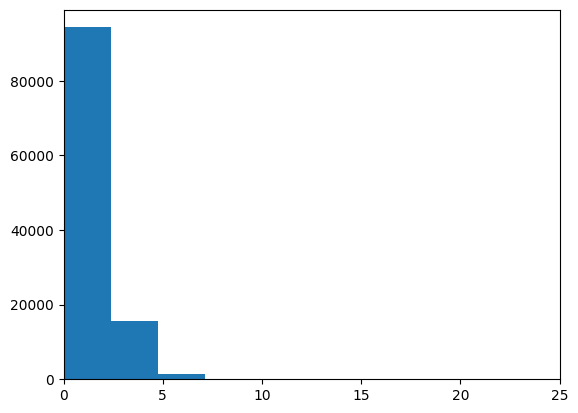

In [14]:
# See pattern of distance
plt.hist(temp['distance'], bins=5000)
plt.xlim(0,25)

In [15]:
# exclude distance >10 
print(sum(temp['distance'] >10))
temp.drop(temp[temp['distance']>10].index,inplace=True)

83


### Duration

In [17]:
# omit time <0
print('time <0 that are deleted:', sum(temp['resto_avg_merchant_prepare_time'] <=0))
temp = temp[temp['resto_avg_merchant_prepare_time'] >0]


time <0 that are deleted: 0


In [18]:
# actual_duration = ATA - time_created & ATA > created
temp['order_created_at_time'] = pd.to_datetime(temp['order_created_at_time'], format = '%H:%M:%S').dt.time
temp['actual_time_arrival'] = pd.to_datetime(temp['actual_time_arrival'], format = '%H:%M:%S').dt.time

temp['actual_duration'] = temp.apply(lambda row: (pd.to_datetime(row['actual_time_arrival'],format='%H:%M:%S') - pd.to_datetime(row['order_created_at_time'], format='%H:%M:%S')).seconds / 60, axis=1).astype(float)

temp = temp[temp['actual_time_arrival'] > temp['order_created_at_time']]

#exclude outliers deliver more than 3 hour
print('more than 3 hours that are deleted: ',sum(temp['actual_duration'] > 60*3))
temp = temp[temp['actual_duration'] <= 60*3] 


more than 3 hours that are deleted:  120


In [19]:
#change from sec to min
temp['resto_avg_delivery_time'] = temp['resto_avg_delivery_time']/60
temp['resto_avg_merchant_prepare_time'] = temp['resto_avg_merchant_prepare_time']/60
temp['resto_avg_driver_arrive_resto_time'] = temp['resto_avg_driver_arrive_resto_time']/60

# estimated_duration = sum avg
temp['estimated_total_duration'] = temp['resto_avg_delivery_time'] + temp['resto_avg_merchant_prepare_time'] + temp['resto_avg_driver_arrive_resto_time']

# gap
temp['gap'] = temp['estimated_total_duration'] - temp['actual_duration']

Figure(800x600) [<Axes: > <Axes: > <Axes: >]
count    111083.000000
mean          3.635971
std           1.431514
min           0.033333
50%           3.460133
90%           5.108333
max          54.483333
Name: resto_avg_driver_arrive_resto_time, dtype: float64
Figure(800x600) Axes(0.125,0.653529;0.775x0.226471)
count    111083.000000
mean          6.881124
std           3.253218
min           0.183333
50%           6.341667
90%          10.824444
max         118.216667
Name: resto_avg_merchant_prepare_time, dtype: float64
Figure(800x600) Axes(0.125,0.381765;0.775x0.226471)
count    111083.000000
mean          9.545642
std           3.171883
min           0.216667
50%           9.190152
90%          12.196438
max         161.777778
Name: resto_avg_delivery_time, dtype: float64
Figure(800x600) Axes(0.125,0.11;0.775x0.226471)


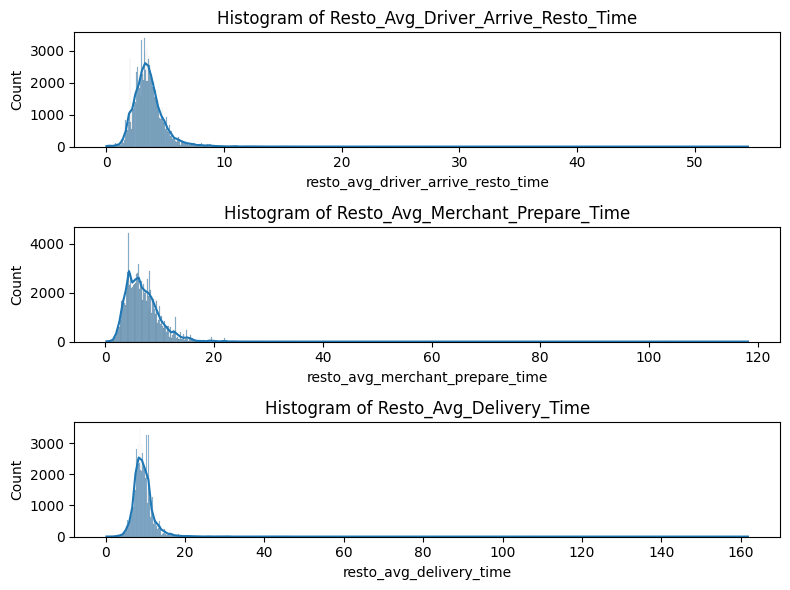

In [20]:
# plot histogram of 3 avg time
columns = ["resto_avg_driver_arrive_resto_time", "resto_avg_merchant_prepare_time", "resto_avg_delivery_time"]
data = temp

fig, ax = plt.subplots(len(columns), 1, figsize=(8, 6))  
print(fig, ax)

for col, ax in zip(columns, ax):
    print(temp[col].describe(percentiles=[0.9]))
    sns.histplot(data=data, x=col, ax=ax, kde=True) 
    ax.set_title(f"Histogram of {col.title()}")
    print(fig, ax)

plt.tight_layout()  
plt.show()

In [21]:
#exclude outliers 
print('- Before - ',f"resto_avg_delivery_time >30min: {sum(temp['resto_avg_delivery_time'] > 30)}\n"
      f"resto_avg_merchant_prepare_time >30min: {sum(temp['resto_avg_merchant_prepare_time'] > 30)}\n"
      f"resto_avg_driver_arrive_resto_time >10min: {sum(temp['resto_avg_driver_arrive_resto_time'] > 10)}")

temp = temp[temp['resto_avg_delivery_time'] <= 30] 
temp = temp[temp['resto_avg_merchant_prepare_time'] <= 30]
temp = temp[temp['resto_avg_driver_arrive_resto_time'] <= 10]

print('- After - ',f"resto_avg_delivery_time >30min: {sum(temp['resto_avg_delivery_time'] > 30)}\n"
      f"resto_avg_merchant_prepare_time >30min: {sum(temp['resto_avg_merchant_prepare_time'] > 30)}\n"
      f"resto_avg_driver_arrive_resto_time >10min: {sum(temp['resto_avg_driver_arrive_resto_time'] > 10)}")


- Before -  resto_avg_delivery_time >30min: 256
resto_avg_merchant_prepare_time >30min: 50
resto_avg_driver_arrive_resto_time >10min: 446
- After -  resto_avg_delivery_time >30min: 0
resto_avg_merchant_prepare_time >30min: 0
resto_avg_driver_arrive_resto_time >10min: 0


In [22]:
temp.head(3)

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,actual_time_arrival,distance,actual_duration,estimated_total_duration,gap
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,5.073810,8.680952,10.873810,2,15,00:28:13,3.148600,25.200000,24.628571,-0.571429
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,4.249020,4.666667,7.015686,2,4,00:17:01,1.656457,13.833333,15.931373,2.098039
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,3.673171,7.901626,8.294309,1,9,00:16:55,1.092011,12.716667,19.869106,7.152439


### Weekday

In [23]:
# Encoding categorical into numerical
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

temp['week_day_code'] = temp['week_day'].map(weekday_mapping)
temp['is_weekend'] = np.where(temp['week_day_code'].isin([6,7]),1,0)

(0.0, 50000.0)

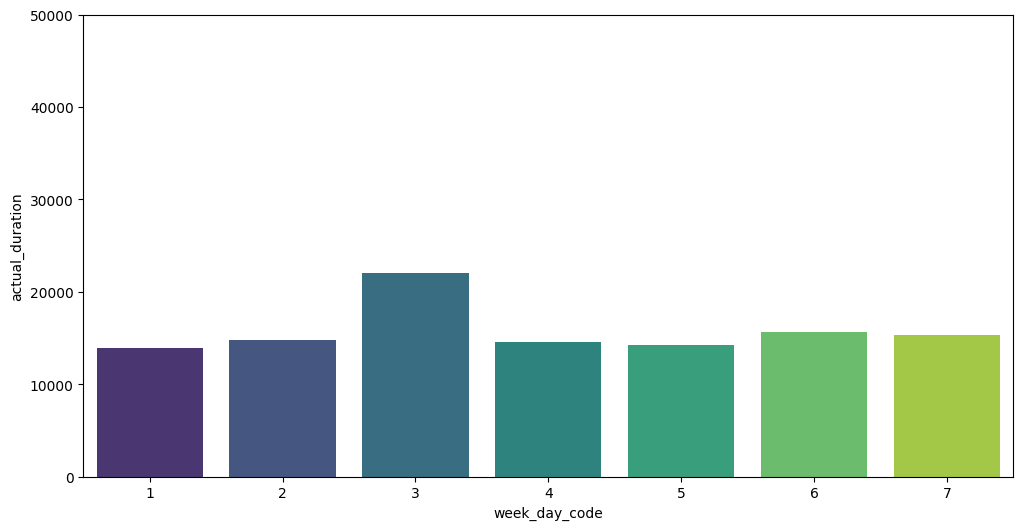

In [24]:
# See pattern of weekdays
plt.figure(figsize=(12, 6))
sns.barplot(x='week_day_code', y='actual_duration', 
            # hue='week_day_code', 
            data=temp.groupby(['week_day_code'])[['actual_duration']].count().reset_index(), palette='viridis').set_ylim(0,50000)



Wednesday seems to be the day with highest frequency, ~1.5 times on other days -> should set it as a new feature

In [25]:
temp['is_Wed'] = np.where(temp['week_day_code'] == 3,1,0)

### Hour

In [26]:
temp['hour_created'] = temp['order_created_at_time'].astype('str').str.split(':').str[0].astype('int')

<Axes: xlabel='hour_created', ylabel='actual_duration'>

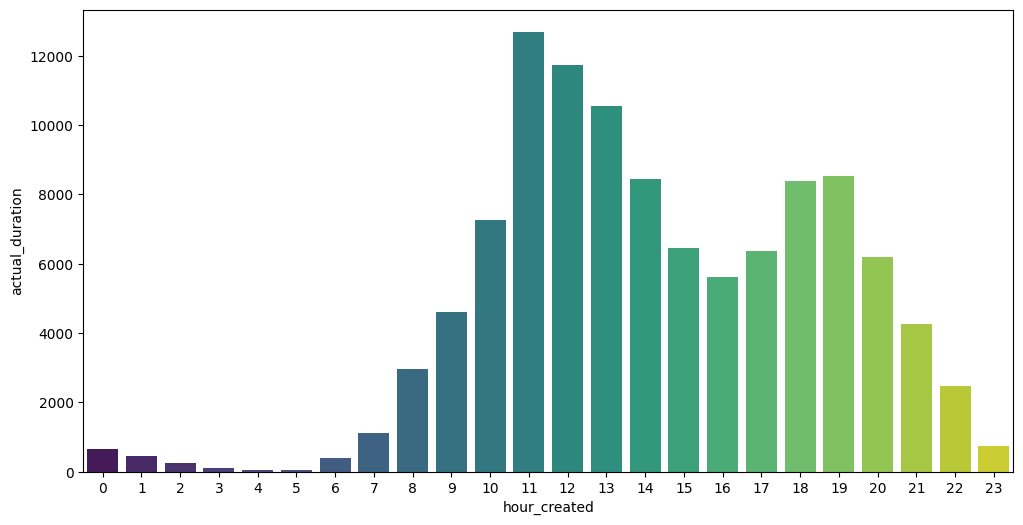

In [27]:
# See pattern of hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='actual_duration', 
            data=temp.groupby(['hour_created'])[['actual_duration']].count().reset_index(), palette='viridis')


Users often order in the afternoon more than other time of day.

Lunch and dinner time often has higher frequency

In [28]:
temp['is_peak_hour'] = np.where(temp['hour_created'].isin([11,12,13,18,19]),1,0)

### Time per item

<Axes: xlabel='no_items', ylabel='actual_duration'>

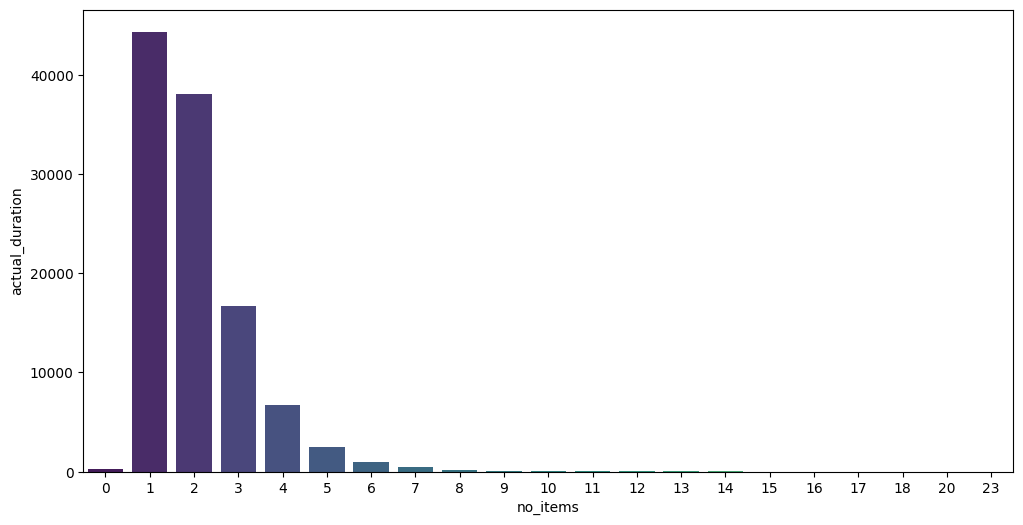

In [29]:
# See pattern of items
plt.figure(figsize=(12, 6))
sns.barplot(x='no_items', y='actual_duration', 
            # hue='week_day_code', 
            data=temp.groupby(['no_items'])[['actual_duration']].count().reset_index(), palette='viridis')


In [30]:
# drop no_items = 0
print('no_item = 0 that are deleted: ', sum(temp['no_items'] ==0))
temp = temp[temp['no_items'] >0]


no_item = 0 that are deleted:  289


In [31]:
temp['avg_per_item'] = temp['resto_avg_merchant_prepare_time']/temp['no_items']

In [32]:
### Clustering locations

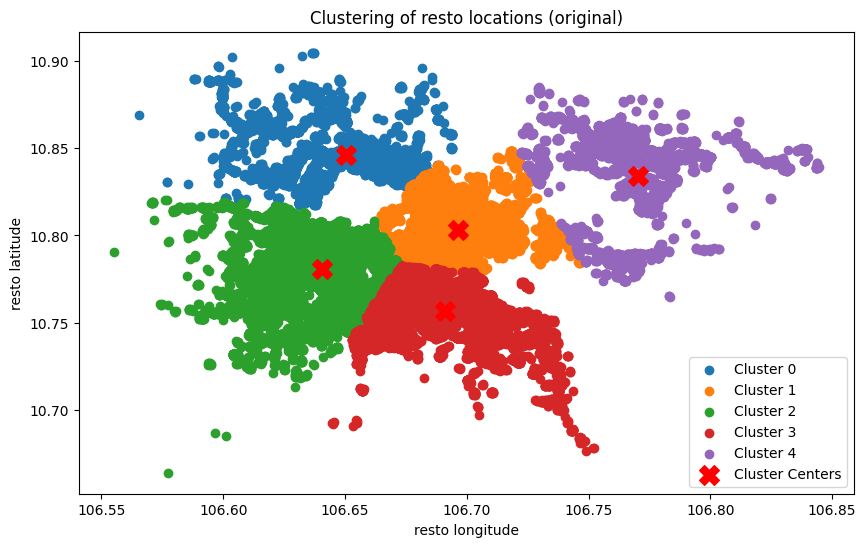

In [33]:
# Resto locations
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

temp['restaurant_cluster_no'] = kmeans.fit_predict(temp[['noised_restaurant_latitude', 'noised_restaurant_longitude']])

plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['restaurant_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_restaurant_longitude'], cluster_data['noised_restaurant_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Clustering of resto locations (original)')
plt.xlabel('resto longitude')
plt.ylabel('resto latitude')
plt.legend()
plt.show()


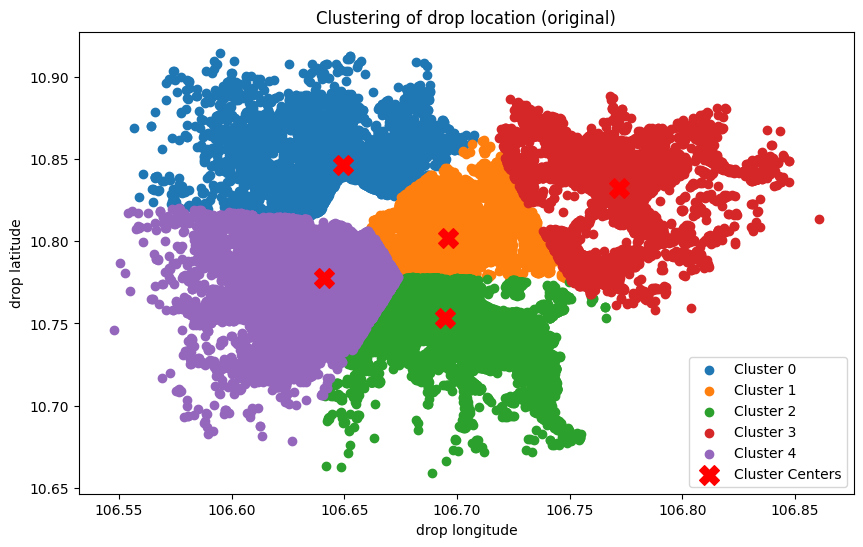

In [34]:
# Drop locations
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

temp['drop_cluster_no'] = kmeans.fit_predict(temp[['noised_drop_latitude', 'noised_drop_longitude']])

plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['drop_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_drop_longitude'], cluster_data['noised_drop_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Clustering of drop location (original)')
plt.xlabel('drop longitude')
plt.ylabel('drop latitude')
plt.legend()
plt.show()


In [35]:
#replace no of cluster in 'drop' to match with 'resto' 
temp['drop_cluster_no'].replace({2:3,3:4,4:2}, inplace=True)

In [36]:
#drop long and lat outliers
temp = temp[(temp['noised_restaurant_latitude'] < 10.9 )
      &
      (temp['noised_restaurant_latitude'] >10.7)
      &
      (temp['noised_drop_latitude'] <10.9)
      &
      (temp['noised_drop_latitude'] >10.7)
]

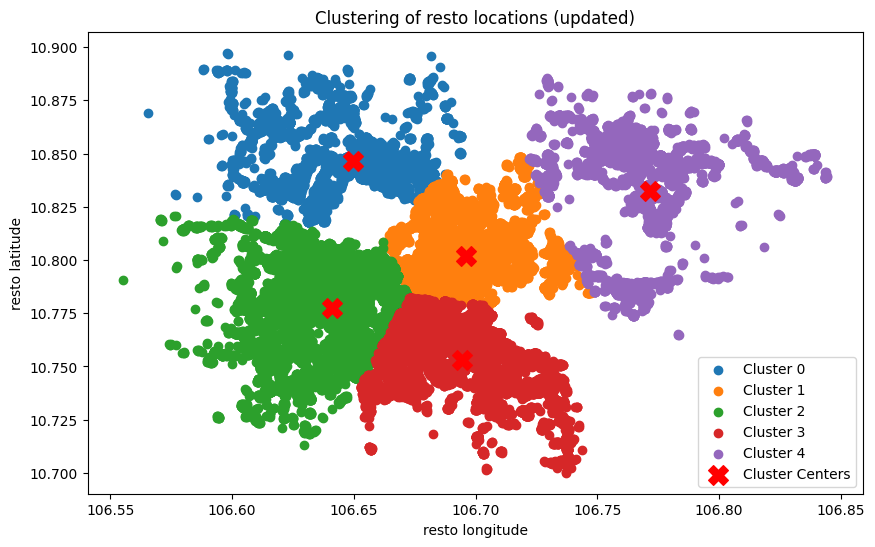

In [37]:
#plot correct map
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['restaurant_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_restaurant_longitude'], cluster_data['noised_restaurant_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Clustering of resto locations (updated)')
plt.xlabel('resto longitude')
plt.ylabel('resto latitude')
plt.legend()
plt.show()


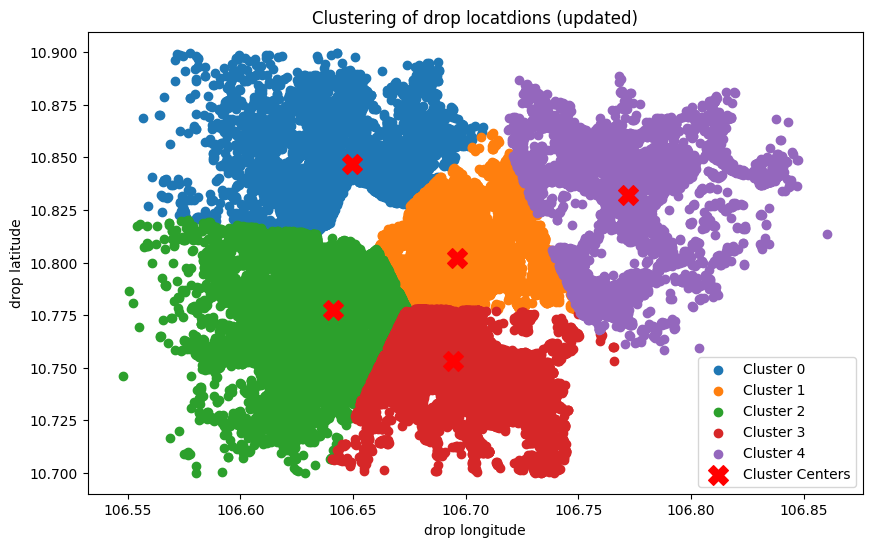

In [38]:
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['drop_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_drop_longitude'], cluster_data['noised_drop_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Clustering of drop locatdions (updated)')
plt.xlabel('drop longitude')
plt.ylabel('drop latitude')
plt.legend()
plt.show()

In [39]:
print(f"{sum(temp['restaurant_cluster_no'] == temp['drop_cluster_no'])/temp.shape[0]*100}% of orders picked at the restaurant are in the same cluster as their drop locations")

85.52810258560193% of orders picked at the restaurant are in the same cluster as their drop locations


In [40]:
# Create new feature for same cluster
temp['is_same_cluster'] = np.where(temp['restaurant_cluster_no'] == temp['drop_cluster_no'],1,0)
temp.head(2)

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,...,gap,week_day_code,is_weekend,is_Wed,hour_created,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,5.07381,8.680952,...,-0.571429,3,0,1,0,0,4.340476,2,2,1
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,4.24902,4.666667,...,2.098039,3,0,1,0,0,2.333333,2,2,1


In [86]:
# temp.to_csv('temp.csv')

In [42]:
#drop columns not use for model
df_train = temp.drop(columns = ['week_day','order_created_at_time', 'restaurant_id_h', 'order_id_h','actual_time_arrival','gap'
    #                             'resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
    #    'resto_avg_delivery_time',
                                # 'estimated_total_duration',
                                # 'restaurant_category_id',
    #                             'noised_restaurant_latitude', 'noised_restaurant_longitude',
    #    'noised_drop_latitude', 'noised_drop_longitude',
       ])

# Data exploration

More on this on Tableau, and on the document

<Axes: >

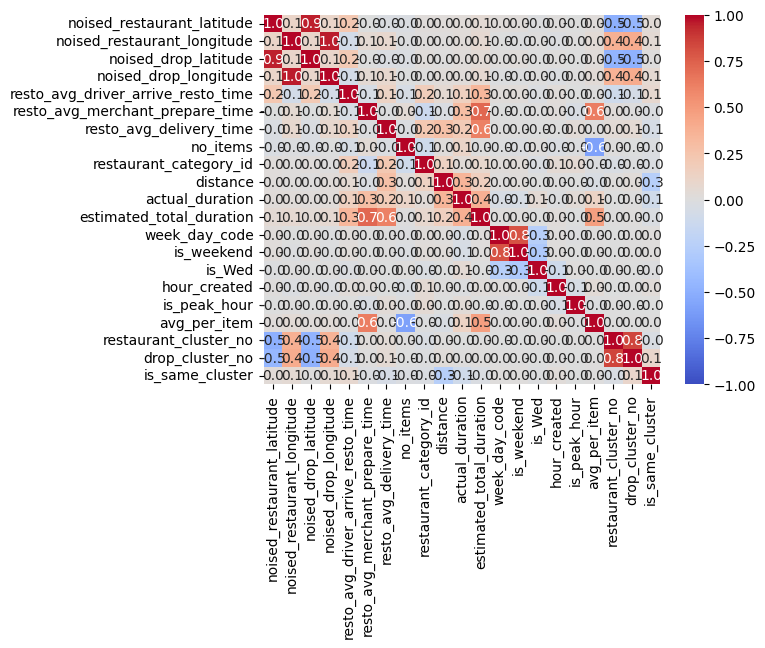

In [43]:
corr_train = df_train.corr(numeric_only=True) 
sns.heatmap(corr_train, annot=True,vmin=-1,vmax=1,cmap='coolwarm', fmt='.1f') 

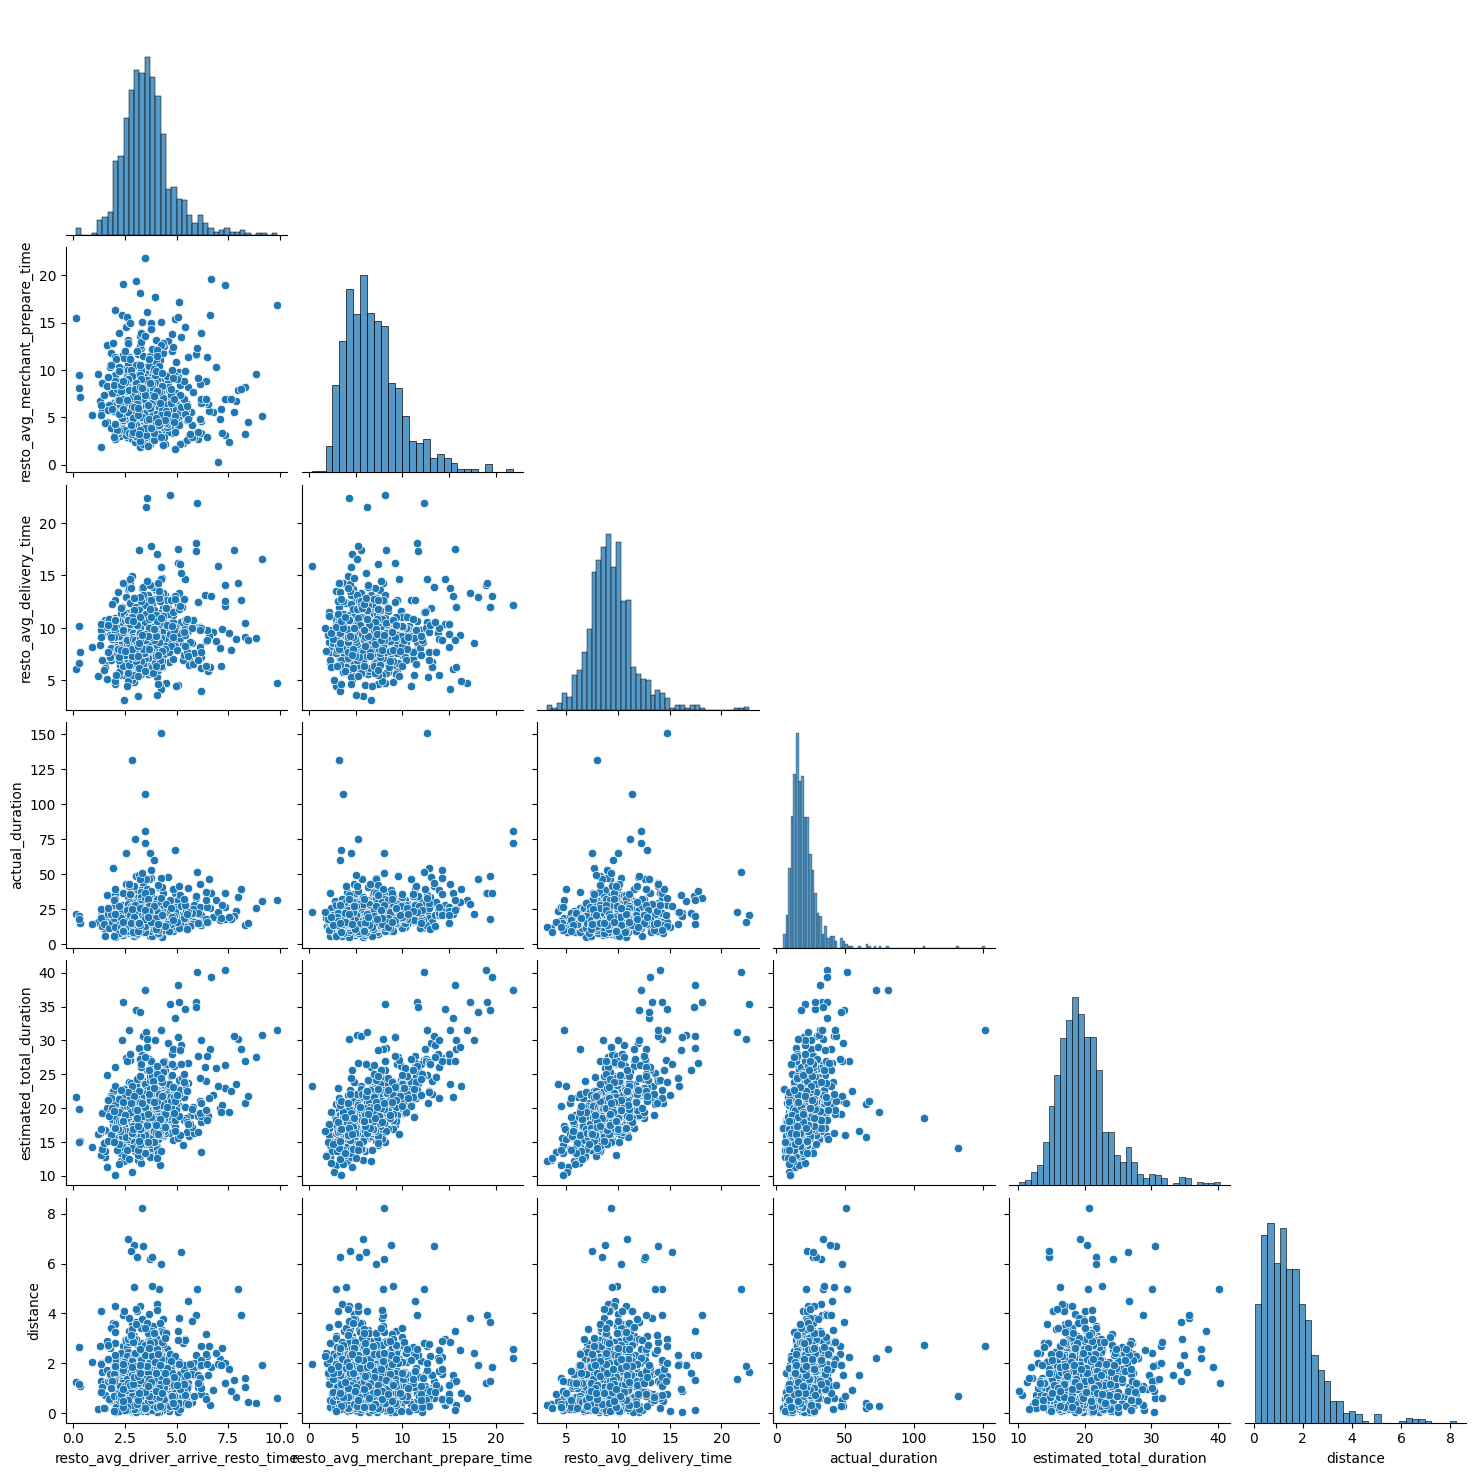

In [44]:
sns.pairplot(df_train[['resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
       'resto_avg_delivery_time','actual_duration',
       'estimated_total_duration','distance']].sample(n=1000),corner=True)

In [45]:
df_train['actual_duration'] = round(df_train['actual_duration'],0)

Orders between 0-6h are often delivered slower although has fewer order. 

Especially on weekend.

<Axes: xlabel='hour_created', ylabel='resto_avg_driver_arrive_resto_time'>

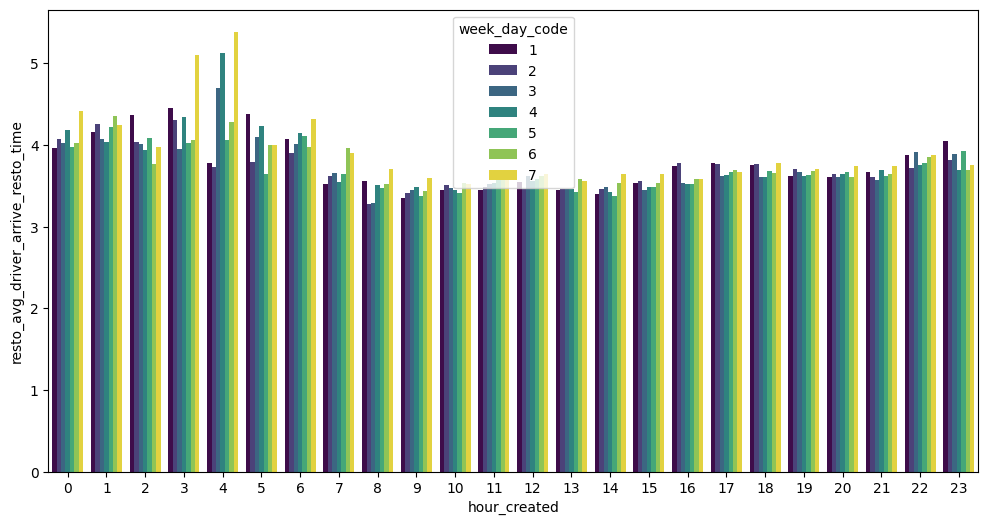

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='resto_avg_driver_arrive_resto_time', hue='week_day_code', data=df_train.groupby(['hour_created','week_day_code'])[['resto_avg_driver_arrive_resto_time']].mean().reset_index(), palette='viridis')

<Axes: xlabel='hour_created', ylabel='resto_avg_driver_arrive_resto_time'>

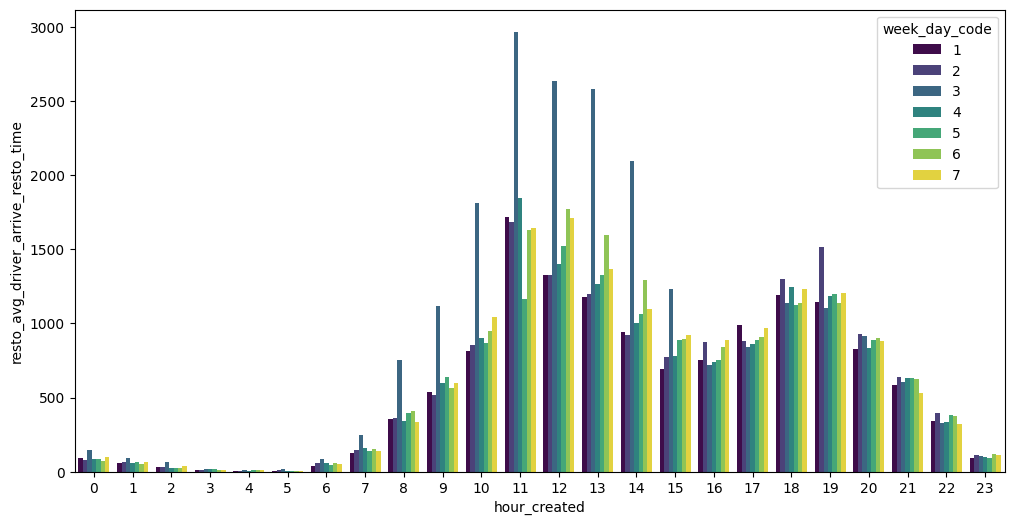

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='resto_avg_driver_arrive_resto_time', hue='week_day_code', data=df_train.groupby(['week_day_code', 'hour_created'])[['resto_avg_driver_arrive_resto_time']].count().reset_index(), palette='viridis')

<Axes: xlabel='hour_created', ylabel='resto_avg_driver_arrive_resto_time'>

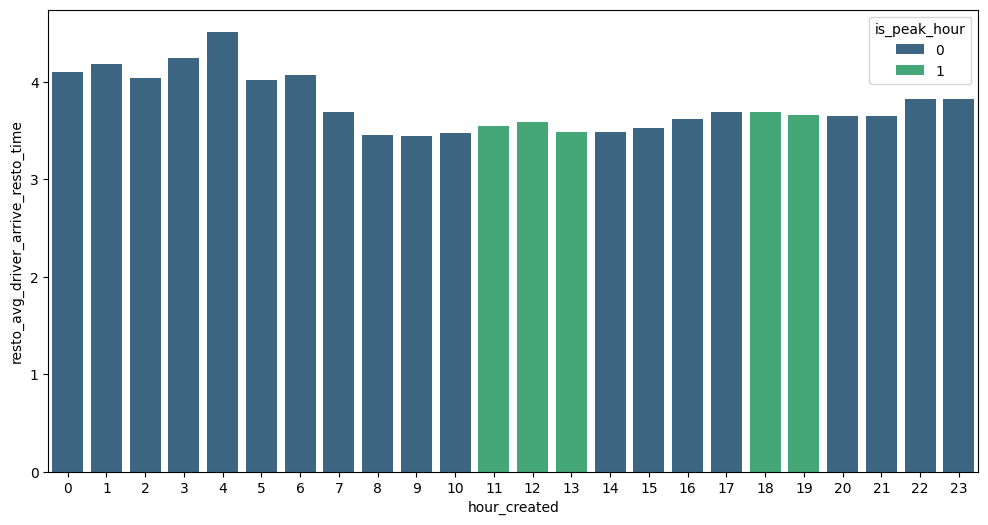

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='resto_avg_driver_arrive_resto_time', hue='is_peak_hour', data=df_train.groupby(['hour_created', 'is_peak_hour'])[['resto_avg_driver_arrive_resto_time']].mean().reset_index(), palette='viridis')

Time preparation varies between restaurant categories. Restaurants in cate 14, 15 has preparation time length = 2 times other cates

<Axes: xlabel='restaurant_category_id', ylabel='resto_avg_merchant_prepare_time'>

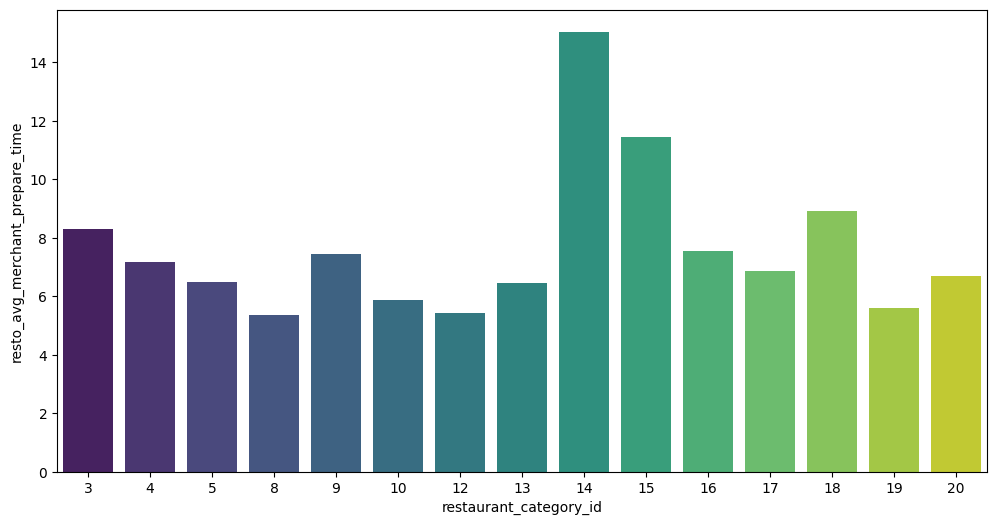

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='restaurant_category_id', y='resto_avg_merchant_prepare_time', 
            # hue='restaurant_category_id', 
            data=df_train.groupby(['restaurant_category_id'])[['resto_avg_merchant_prepare_time']].mean().reset_index(), 
            palette='viridis')


Distance will impact duration more significant at the first 5km

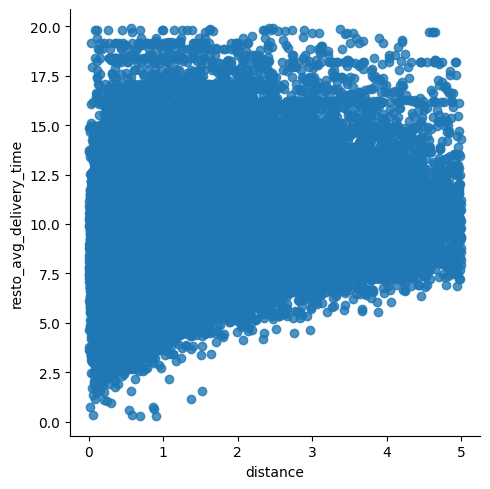

In [50]:
f=df_train[(df_train['distance']<5) & (df_train['resto_avg_delivery_time']<20)]
sns.lmplot(f,x='distance',y='resto_avg_delivery_time', 
           )

In [51]:
f['distance'].corr(f['resto_avg_delivery_time'])


0.2710375101900021

---

# Data modeling

In [54]:
# split features and label 
X = df_train.drop('actual_duration',axis = 1)
y = df_train['actual_duration']

# split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(87778, 20)
(87778,)
(21945, 20)
(21945,)


# Standardization

In [55]:
# create a standardScaler object 
scaler = StandardScaler()

scaler.fit(X_train)

# Perform standardization on the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.

2. Construct the duration prediction model using the identified best model.

3. Find the value of `from` and `to` by identify the max size area in the histogram of the gap between actual and predicted value, with range xmin to xmax = 10 (10 minutes)

3. Compare the results of the prediction model and the simple sum average method 


In [56]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {}, 
    {'max_depth': [5, 7, 9]},
    {'n_estimators': [70,80,90], 'max_depth': [1,3,5]},
]

best_models = []

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=20, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

predictions = []
for model in best_models:
    y_pred = model.predict(X_test)
    predictions.append(pd.Series(y_pred, name=f'{model.__class__.__name__}_predicted'))

# Create a DataFrame with actual and predicted values
result_df = pd.concat([pd.Series(y_test, name='actual')] + predictions, axis=1)

LinearRegression:
Best parameters: {}
Best R2 score: 0.2602484396798418

DecisionTreeRegressor:
Best parameters: {'max_depth': 5}
Best R2 score: 0.21377972194574144

XGBRegressor:
Best parameters: {'max_depth': 5, 'n_estimators': 70}
Best R2 score: 0.31814168349980015



In [57]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=70,max_depth=5)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [58]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 5.16
Mean Squared Error (MSE): 79.28
Root Mean Squared Error (RMSE): 8.9
R-squared (R2) Score: 0.31


In [59]:
result_df

,actual,LinearRegression_predicted,DecisionTreeRegressor_predicted,XGBRegressor_predicted
19509,8.0,24.851956,28.059863,38.407993
7284,15.0,19.826034,19.662440,18.714178
98488,26.0,NaN,NaN,NaN
27468,50.0,NaN,NaN,NaN
13798,21.0,18.512640,18.870570,18.982864
...,...,...,...,...
21940,NaN,19.056954,18.870570,18.929966
21941,NaN,25.153321,23.098438,29.242226
21942,NaN,21.732059,19.662440,19.887959
21943,NaN,19.984243,20.405258,19.239824


In [60]:
# result_df.to_excel('result_df.xlsx', index=False)

In [62]:
# create df concat predict value into original df 
new_df = df_train.copy()

# Add columns for actual and predicted values
new_df['actual'] = result_df['actual']  
for prediction_column in result_df.columns[1:]:  
    new_df[prediction_column] = result_df[prediction_column]

new_df.head()


,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,distance,...,hour_created,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster,actual,LinearRegression_predicted,DecisionTreeRegressor_predicted,XGBRegressor_predicted
0,10.779663,106.604650,10.751649,106.609754,5.073810,8.680952,10.873810,2,15,3.148600,...,0,0,4.340476,2,2,1,NaN,12.271279,12.819760,11.704493
1,10.798146,106.643499,10.808109,106.632191,4.249020,4.666667,7.015686,2,4,1.656457,...,0,0,2.333333,2,2,1,NaN,19.432516,16.350630,17.235996
2,10.796208,106.695271,10.791213,106.686658,3.673171,7.901626,8.294309,1,9,1.092011,...,0,0,7.901626,1,1,1,NaN,17.176714,18.870570,25.947903
3,10.753824,106.683894,10.760239,106.668003,3.357407,4.648457,9.719136,1,12,1.877297,...,0,0,4.648457,3,3,1,13.0,29.326565,30.654006,30.582346
4,10.796606,106.704031,10.789168,106.714135,3.550000,9.154762,11.235714,1,17,1.377733,...,0,0,9.154762,1,1,1,NaN,27.505940,23.702780,23.795933


In [271]:
# new_df.to_excel('new_df.xlsx', index=False)

In [65]:
# drop na 
test_df = new_df.dropna()

In [67]:
''' 
 if normally distribute then we run (which is NOT) 
'''
# threshold = 5

# # Calculate the absolute error between actual and predicted values
# test_df['absolute_error'] = abs(test_df['actual_duration'] - test_df['XGBRegressor_predicted'])

# # Count the number of predictions within the threshold
# within_threshold = test_df[test_df['absolute_error'] <= threshold].shape[0]

# # Calculate the percentage of predictions within the threshold
# accuracy_percentage = (within_threshold / test_df.shape[0]) * 100

# print(f"Accuracy percentage within {threshold} units: {accuracy_percentage:.2f}%")

' \n if normally distribute then we run (which is NOT) \n'

In [69]:
gap_df = new_df.copy()
gap_df['gap'] = gap_df['actual_duration'] - gap_df['XGBRegressor_predicted']

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        4.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 1.000e+01, 9.000e+00,
        1.700e+01, 3.300e+01, 4.600e+01, 6.800e+01, 9.800e+01, 1.670e+02,
        3.040e+02, 5.480e+02, 7.910e+02, 1.185e+03, 1.566e+03, 2.047e+03,
        2.245e+03, 2.348e+03, 2.125e+03, 1.718e+03, 1.377e+03, 1.113e+03,
        8.160e+02, 6.350e+02, 4.490e+02, 3.420e+02, 2.400e+02, 2.100e+02,
        1.630e+02, 1.290e+02, 7.700e+01, 8.300e+01, 6.600e+01, 4.100e+01,
        4.200e+01, 4.100e+01, 4.400e+01, 2.300e+01, 3.700e+01, 2.500e+01,
        2.200e+01, 2.100e+01, 1.400e+01, 2.100e+01, 2.300e+01, 1.700e+01,
        8.000e+00, 9.000e+00, 9.000e+00, 6.000e+00, 1.300e+01, 1.100e+01,
        4.000e+00, 9.000e+00, 7.000e+00, 6.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 4.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 8.000e+00,
        1.000e+00, 4.000e+00, 4.000e+0

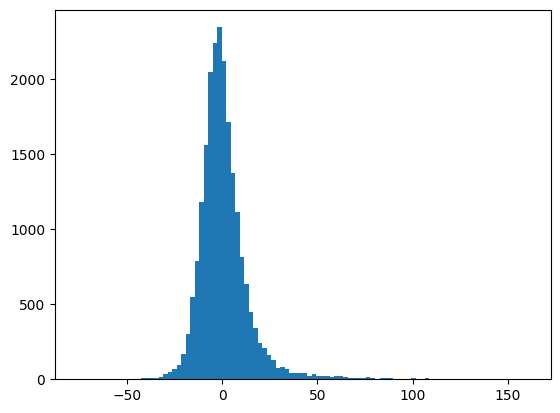

In [70]:
plt.hist(gap_df['gap'], bins=100)
# plt.xlim(-50,50)

In [72]:
# gap_df.dropna()
gap_df = gap_df.dropna()

Best xmin model: -8
Best xmax model: 2


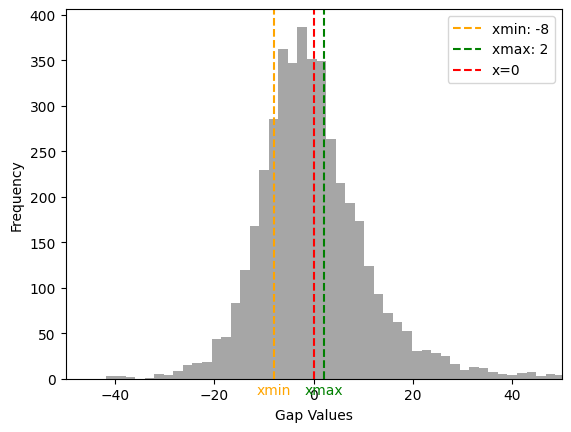

In [79]:
# find the maximum area between two points xmin and xmax
max_area = 0
best_xmin_model = None
best_xmax_model = None

for xmin in range(int(gap_df['gap'].min()), int(gap_df['gap'].max()) - 9):
    xmax = xmin + 10
    area = sum((gap_df['gap'] >= xmin) & (gap_df['gap'] <= xmax))

    if area > max_area:
        max_area = area
        best_xmin_model = xmin
        best_xmax_model = xmax

print("Best xmin model:", best_xmin_model)
print("Best xmax model:", best_xmax_model)

plt.hist(gap_df['gap'], bins=100, alpha=0.7, color='grey')

# draw lines
plt.axvline(x=best_xmin_model, color='orange', linestyle='--', label=f'xmin: {best_xmin_model}')
plt.axvline(x=best_xmax_model, color='green', linestyle='--', label=f'xmax: {best_xmax_model}')
plt.axvline(x=0, color='red', linestyle='--', label='x=0')

plt.xlabel('Gap Values')
plt.ylabel('Frequency')
plt.legend()
plt.annotate(f'xmin', xy=(best_xmin_model, 0), xytext=(best_xmin_model, -5),
                 ha='center', va='top', color='orange')
plt.annotate(f'xmax', xy=(best_xmax_model, 0), xytext=(best_xmax_model, -5),
                 ha='center', va='top', color='green')
plt.xlim(-50,50)

plt.show()


In [80]:
threshold_left = best_xmin_model
threshold_right = best_xmax_model

# Calculate the absolute error between actual and predicted values
test_df['absolute_error'] = (test_df['actual_duration'] - test_df['XGBRegressor_predicted'])

# Count the number of predictions within the threshold
within_threshold = test_df[
    (test_df['absolute_error'] >= threshold_left) & 
    (test_df['absolute_error'] <= threshold_right)
].shape[0]

# Calculate the percentage of predictions within the threshold
accuracy_percentage = (within_threshold / test_df.shape[0]) * 100

print(f"Accuracy percentage within [{threshold_left}, {threshold_right}] units: {accuracy_percentage:.2f}%")


Accuracy percentage within [-8, 2] units: 42.38%


In [81]:
# wrong_df = test_df[test_df['absolute_error']>10]
# wrong_df.head()

# the 2nd way: calculate basic sum of avg if not use model to predict

Best xmin sum average: -3
Best xmax sum average: 7


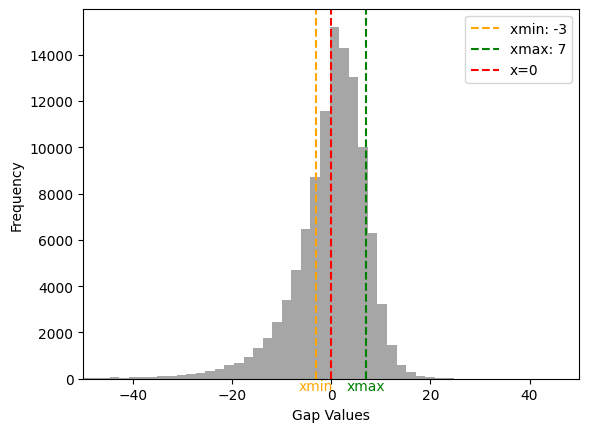

In [82]:
# find the maximum area between two points xmin and xmax
max_area = 0
best_xmin_normal = None
best_xmax_normal = None

for xmin in range(int(temp['gap'].min()), int(temp['gap'].max()) - 9):
    xmax = xmin + 10
    area = sum((temp['gap'] >= xmin) & (temp['gap'] <= xmax))

    if area > max_area:
        max_area = area
        best_xmin_normal = xmin
        best_xmax_normal = xmax

print("Best xmin sum average:", best_xmin_normal)
print("Best xmax sum average:", best_xmax_normal)

plt.hist(temp['gap'], bins=100, alpha=0.7, color='grey')

plt.axvline(x=best_xmin_normal, color='orange', linestyle='--', label=f'xmin: {best_xmin_normal}')
plt.axvline(x=best_xmax_normal, color='green', linestyle='--', label=f'xmax: {best_xmax_normal}')
plt.axvline(x=0, color='red', linestyle='--', label='x=0')

plt.xlabel('Gap Values')
plt.ylabel('Frequency')
plt.legend()

plt.annotate(f'xmin', xy=(best_xmin_normal, 0), xytext=(best_xmin_normal, -5),
                 ha='center', va='top', color='orange')
plt.annotate(f'xmax', xy=(best_xmax_normal, 0), xytext=(best_xmax_normal, -5),
                 ha='center', va='top', color='green')
plt.xlim(-50,50)
plt.show()


In [83]:
threshold_left = best_xmin_normal
threshold_right = best_xmax_normal

# calculate the absolute error between actual and predicted values
temp['absolute_error'] = (temp['actual_duration'] - temp['estimated_total_duration'])

# count the number of predictions within the threshold
within_threshold = temp[
    (temp['absolute_error'] >= threshold_left) & 
    (temp['absolute_error'] <= threshold_right)
].shape[0]

# calculate the percentage of predictions within the threshold
accuracy_percentage = (within_threshold / temp.shape[0]) * 100

print(f"Accuracy percentage within [{threshold_left}, {threshold_right}] units: {accuracy_percentage:.2f}%")


Accuracy percentage within [-3, 7] units: 49.72%



**⇒ In conclusion, it seems that the most accurate approach is to simply calculate the sum of 3 values**

`resto_avg_driver_arrive_resto_time`, `resto_avg_merchant_prepare_time`,
`resto_avg_delivery_time` , rounded up, then -3 min for `from` and +7 min for `to`

**However, I believe the regression model approach is still better in long term if we introduced more features to the dataset, such as weather, driver age, driver rating, merchant rating, road traffic density, actual time point; or larger dataset with longer period, etc. If that is the case, XGB Regression might be the optimal model, then you can round up the values and -8 min to find `from` and +2 min to find `to`**